<a href="https://colab.research.google.com/github/Narmadhakannan/foundation-of-machine-learning/blob/main/exp_8_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 10 complete
Iteration 20 complete
Iteration 30 complete
Iteration 40 complete
Iteration 50 complete
Iteration 60 complete
Iteration 70 complete
Iteration 80 complete
Iteration 90 complete
Iteration 100 complete
Accuracy: 0.9385964912280702
Precision: 0.9452054794520548
Recall: 0.9583333333333334
F1 Score: 0.9517241379310345
ROC AUC: 0.9914021164021164

Confusion Matrix:
 [[38  4]
 [ 3 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.90      0.92        42
           1       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



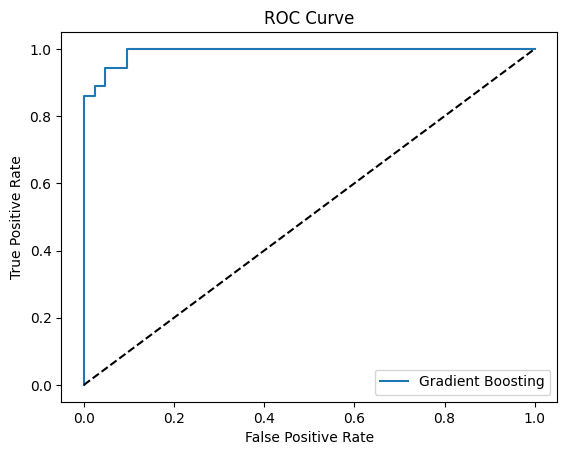

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_estimators = 100
learning_rate = 0.1
max_depth = 3

F_train = np.full(y_train.shape, y_train.mean())
F_test = np.full(y_test.shape, y_train.mean())

for i in range(n_estimators):
    residuals = y_train - F_train

    tree = DecisionTreeRegressor(max_depth=max_depth)
    tree.fit(X_train, residuals)

    update = learning_rate * tree.predict(X_train)
    F_train += update
    F_test += learning_rate * tree.predict(X_test)

    if (i+1) % 10 == 0:
        print(f"Iteration {i+1} complete")

y_pred = (F_test >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, F_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, F_test)
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
